# Explore here

In [96]:
# Your code here

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split


from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

from sklearn.metrics import silhouette_score

from sklearn.decomposition import PCA

import warnings

Cargamos los datos del modelo

In [97]:
total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv")
total_data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [98]:
X = total_data[["MedInc", "Latitude", "Longitude"]]
X.head()

,MedInc,Latitude,Longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25


In [99]:
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)
X_train.head()

,MedInc,Latitude,Longitude
14196,3.2596,32.71,-117.03
8267,3.8125,33.77,-118.16
17445,4.1563,34.66,-120.48
14265,1.9425,32.69,-117.11
2271,3.5542,36.78,-119.80


Construímos un K-means con los datos de MedINC, Latitude y Longitude

In [100]:
model = KMeans(n_clusters = 6, random_state = 42)
model.fit(X)

KMeans(n_clusters=6, random_state=42)

In [101]:
model2 = KMeans(n_clusters = 6, random_state = 42)
model2.fit(X_train)

KMeans(n_clusters=6, random_state=42)

In [102]:
centroids = model.cluster_centers_
labels = model.labels_

In [103]:
centroids2 = model2.cluster_centers_
labels2 = model2.labels_

In [104]:
centroids2 = pd.DataFrame(centroids2)
centroids2.shape

(6, 3)

In [105]:
labels

array([2, 2, 2, ..., 1, 1, 1], shape=(20640,), dtype=int32)

In [106]:
clusters = list(labels)
X["clusters"] = clusters
X.head()

/tmp/ipykernel_1000/2409062953.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["clusters"] = clusters


,MedInc,Latitude,Longitude,clusters
0,8.3252,37.88,-122.23,2
1,8.3014,37.86,-122.22,2
2,7.2574,37.85,-122.24,2
3,5.6431,37.85,-122.25,2
4,3.8462,37.85,-122.25,1


In [107]:
clusters2 = list(labels2)
X_train["clusters"] = clusters2
X_train.head()

,MedInc,Latitude,Longitude,clusters
14196,3.2596,32.71,-117.03,3
8267,3.8125,33.77,-118.16,1
17445,4.1563,34.66,-120.48,1
14265,1.9425,32.69,-117.11,3
2271,3.5542,36.78,-119.80,5


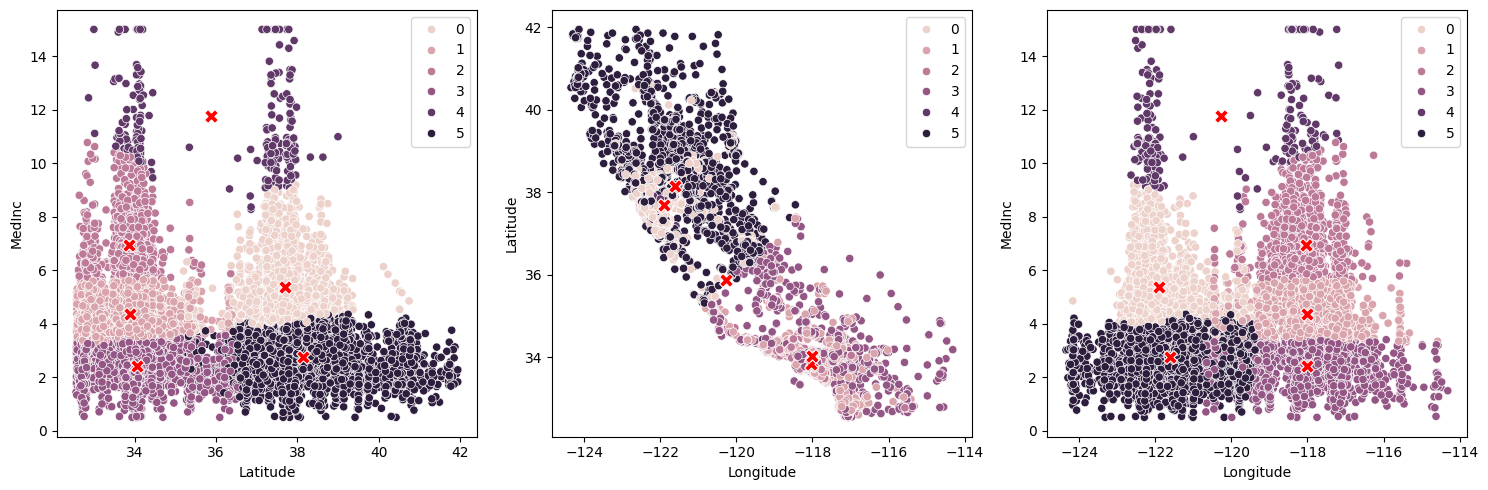

In [108]:
fig, axis = plt.subplots(1, 3, figsize=(15,5))

sns.scatterplot(ax=axis[0], data=X_train, x="Latitude", y="MedInc", hue="clusters")
sns.scatterplot(ax=axis[1], data=X_train, x="Longitude", y="Latitude", hue="clusters")
sns.scatterplot(ax=axis[2], data=X_train, x="Longitude", y="MedInc", hue="clusters")

sns.scatterplot(ax=axis[0], x=centroids2.iloc[:,1], y=centroids2.iloc[:,0], marker="X", s=100, color="red")
sns.scatterplot(ax=axis[1], x=centroids2.iloc[:,2], y=centroids2.iloc[:,1], marker="X", s=100, color="red")
sns.scatterplot(ax=axis[2], x=centroids2.iloc[:,2], y=centroids2.iloc[:,0], marker="X", s=100, color="red")

plt.tight_layout()
plt.show()

Podemos ver que los clusters están más claramente divididos entre la latitud y longitud con MedInc. No obstante entre latitud y longitud la diferencia entre los clusters se junta más de lo que nos gustaría.

Predicciones:

In [109]:
y_test = list(model2.predict(X_test))
X_test["clusters"] = y_test
X_test.head()

,MedInc,Latitude,Longitude,clusters
20046,1.6812,36.06,-119.01,3
3024,2.5313,35.14,-119.46,3
15663,3.4801,37.80,-122.44,5
20484,5.7376,34.28,-118.72,2
9814,3.7250,36.62,-121.93,5


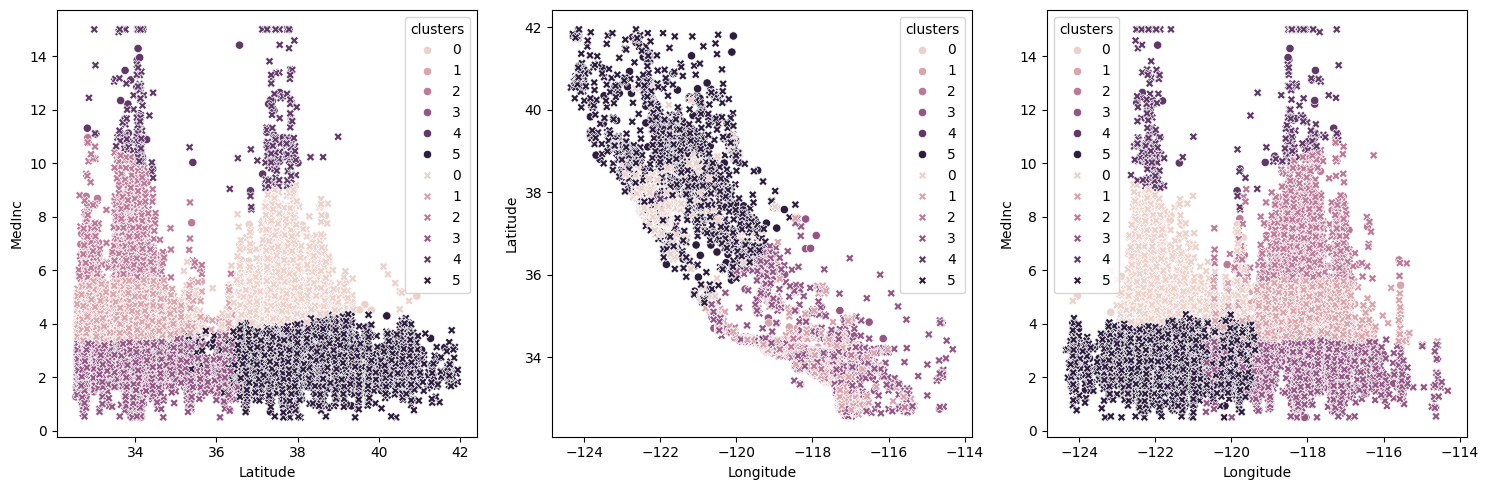

In [110]:
fig, axis = plt.subplots(1, 3, figsize=(15,5))

sns.scatterplot(ax=axis[0], data=X_test, x="Latitude", y="MedInc", hue="clusters")
sns.scatterplot(ax=axis[1], data=X_test, x="Longitude", y="Latitude", hue="clusters")
sns.scatterplot(ax=axis[2], data=X_test, x="Longitude", y="MedInc", hue="clusters")


sns.scatterplot(ax=axis[0], data=X_train, x="Latitude", y="MedInc", hue="clusters", marker="X")
sns.scatterplot(ax=axis[1], data=X_train, x="Longitude", y="Latitude", hue="clusters", marker="X")
sns.scatterplot(ax=axis[2], data=X_train, x="Longitude", y="MedInc", hue="clusters", marker="X")

plt.tight_layout()
plt.show()

Vemos como los datos de X_train y X_test se encuentran en los mismo clusters. Esto significa que la predicción de los clusters ha sido buena.

Ahora probamos con un modelo supervisado: Árbol de decisión

In [111]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

y_train = clusters2

model3 = DecisionTreeClassifier(random_state = 42)
model3.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

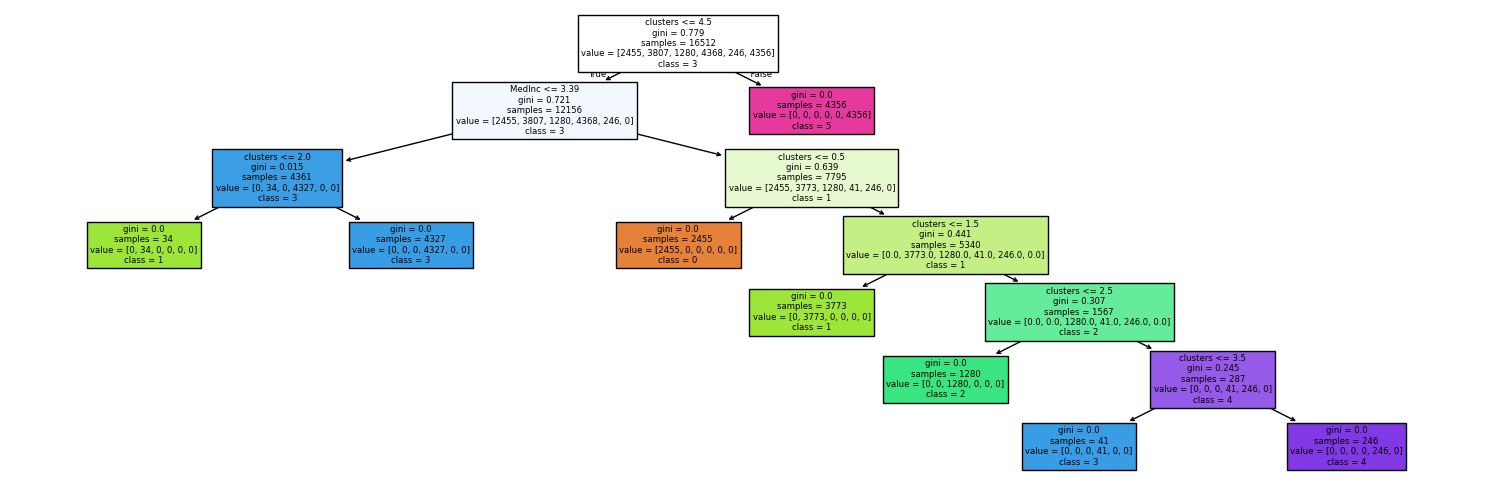

In [112]:
fig, axis = plt.subplots(figsize=(15,5))

tree.plot_tree(model3, feature_names = list(X_train.columns), class_names = ["0", "1", "2", "3", "4", "5"], filled=True)

plt.tight_layout()
plt.show()

In [113]:
y_tree_pred = model3.predict(X_test)
y_tree_pred

array([3, 3, 5, ..., 4, 5, 1], shape=(4128,), dtype=int32)

In [115]:
from sklearn.metrics import accuracy_score

accuracy_score = accuracy_score(y_test, y_tree_pred)
print(accuracy_score)

1.0


Vemos que el resultado del accuracy score es perfecto, es de 1.0

In [124]:
print(os.getcwd())
print(os.listdir())

/workspaces/pablomorena-machine-learning-python-template-UNSUPERVISED-LEARNING/src
['utils.py', 'explore.ipynb', 'app.py']


In [128]:
import os
from pickle import dump

dump(model2, open("../models/model_unsupervised.sav", "wb"))
dump(model3, open("../models/Model_supervised.sav", "wb"))